<a href="https://colab.research.google.com/github/books-by-chansung/ds-bookcamp/blob/main/notebooks/ds_bookcamp_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p /usr/share/fonts/truetype/nanum
!wget https://github.com/books-by-chansung/ds-bookcamp/blob/main/NanumBarunGothic.ttf?raw=true -O /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf

--2024-08-15 14:43:47--  https://github.com/books-by-chansung/ds-bookcamp/blob/main/NanumBarunGothic.ttf?raw=true
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/books-by-chansung/ds-bookcamp/raw/main/NanumBarunGothic.ttf [following]
--2024-08-15 14:43:47--  https://github.com/books-by-chansung/ds-bookcamp/raw/main/NanumBarunGothic.ttf
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/books-by-chansung/ds-bookcamp/main/NanumBarunGothic.ttf [following]
--2024-08-15 14:43:48--  https://raw.githubusercontent.com/books-by-chansung/ds-bookcamp/main/NanumBarunGothic.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.co

In [2]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정

In [6]:
import numpy as np
from scipy import stats

## 7-1

In [3]:
population_mean = 80
population_variance = 100

## 7-2

In [4]:
mean = population_mean
sem = (population_variance / 18) ** 0.5

## 7-3

In [7]:
prob_high_grade = stats.norm.sf(84, mean, sem)
print(f"평균 성적이 84보다 클 확률은 {prob_high_grade} 입니다.")

평균 성적이 84보다 클 확률은 0.044843010885182284 입니다.


## 7-4

In [8]:
prob_low_grade = stats.norm.cdf(76, mean, sem)
print(f"평균 성적이 76 이하일 확률은 {prob_low_grade} 입니다")

평균 성적이 76 이하일 확률은 0.044843010885182284 입니다


## 7-5

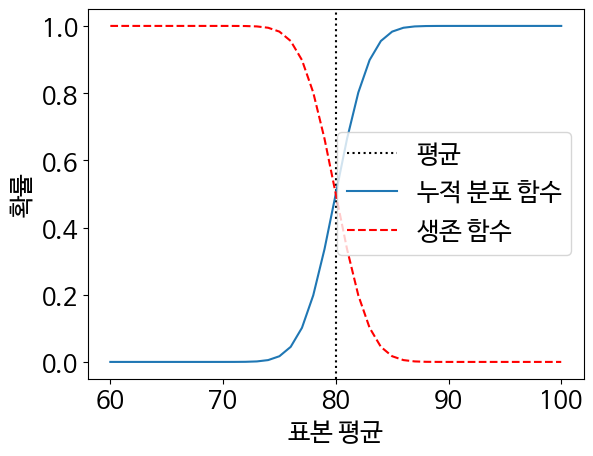

In [9]:
for x in range(-100, 100):
    sf_value = stats.norm.sf(mean + x, mean, sem)
    assert sf_value == stats.norm.cdf(mean - x, mean, sem)

plt.axvline(mean, color='k', label='평균', linestyle=':')
x_values = range(60, 101)
plt.plot(x_values, stats.norm.cdf(x_values, mean, sem), label='누적 분포 함수')
plt.plot(x_values, stats.norm.sf(x_values, mean, sem), label='생존 함수', linestyle='--', color='r')
plt.xlabel('표본 평균')
plt.ylabel('확률')
plt.legend()
plt.show()

## 7-6

In [10]:
p_value = prob_low_grade + prob_high_grade
assert p_value == 2 * prob_high_grade
print(f"p-값은 {p_value} 입니다")

p-값은 0.08968602177036457 입니다


## 7-7

In [12]:
def compute_p_value(observed_mean, population_mean, sem):
    mean_diff = abs(population_mean - observed_mean)
    prob_high = stats.norm.sf(population_mean + mean_diff, population_mean, sem)
    return 2 * prob_high

new_p_value = compute_p_value(85, mean, sem)
print(f"갱신된 p-값은 {new_p_value} 입니다")

갱신된 p-값은 0.03389485352468927 입니다


## 7-8

In [13]:
for grade in range(80, 100):
    p_value = compute_p_value(grade, mean, sem)
    if p_value < 0.001:
        break

print(f"평균 성적이 {grade} 일 때, p-값은 {p_value} 입니다.")

평균 성적이 88 일 때, p-값은 0.0006885138966450773 입니다.


## 7-9

In [14]:
np.random.seed(0)
random_average_grade = np.random.normal(mean, sem)
print(f"평균 성적은 {random_average_grade:.2f}입니다")

평균 성적은 84.16입니다


## 7-10

In [15]:
if compute_p_value(random_average_grade, mean, sem) <= 0.05:
    print("관찰된 결과는 통계적으로 유의미합니다")
else:
    print("관찰된 결과는 통계적으로 유의미하지 않습니다")

관찰된 결과는 통계적으로 유의미하지 않습니다


## 7-11

In [17]:
np.random.seed(0)
for i in range(1, 49):
    print(f"{i + 1} 번째 주 방문")
    random_average_grade = np.random.normal(mean, sem)
    p_value = compute_p_value(random_average_grade, mean, sem)
    if p_value <= 0.05:
        print("통계적으로 유의미한 결과를 발견했습니다.")
        print(f"평균 성적은 {random_average_grade:.2f} 이었습니다.")
        print(f"p-값은 {p_value} 이었습니다.")
        break

if i == 48:
    print("모든 주를 방문했으나, 유의미한 결과는 발견하지 못했습니다.")

2 번째 주 방문
3 번째 주 방문
4 번째 주 방문
5 번째 주 방문
통계적으로 유의미한 결과를 발견했습니다.
평균 성적은 85.28 입니다.
p-값은 0.025032993883401307 이었습니다.


## 7-12

In [18]:
num_planned_experiments = 49
significance_level = .05 / num_planned_experiments

## 7-13

In [20]:
np.random.seed(0)
for i in range(49):
    random_average_grade = np.random.normal(mean, sem)
    p_value = compute_p_value(random_average_grade, mean, sem)
    if p_value <= significance_level:
        print("통계적으로 유의미한 결과를 발견했습니다.")
        print(f"평균 성적은 {random_average_grade:.2f} 이었습니다.")
        print(f"p-값은 {p_value} 이었습니다")
        break

if i == 48:
    print("모든 주를 방문했으나, 유의미한 결과는 발견하지 못했습니다.")

모든 주를 방문했으나, 유의미한 결과는 발견하지 못했습니다.


## 7-14

In [21]:
fish_lengths = np.array([46.7, 17.1, 2.0, 19.2, 7.9, 15.0, 43.4, 8.8, 47.8, 19.5, 2.9, 53.0, 23.5, 118.5, 3.8, 2.9, 53.9, 23.9, 2.0, 28.2])
assert fish_lengths.mean() == 27

## 7-15

In [22]:
np.random.seed(0)
random_fish_length = np.random.choice(fish_lengths, size=1)[0]
sampled_fish_lengths = [random_fish_length]

## 7-16

In [23]:
np.random.seed(0)
for _ in range(20):
    random_fish_length = np.random.choice(fish_lengths, size=1)[0]
    sampled_fish_lengths.append(random_fish_length)

## 7-17

In [24]:
sample_mean = np.mean(sampled_fish_lengths)
print(f"샘플링된 평균 물고기의 길이는 {sample_mean:.2f}cm 입니다")

샘플링된 평균 물고기의 길이는 26.03cm 입니다


## 7-18

In [25]:
np.random.seed(0)
new_sampled_fish_lengths = np.random.choice(fish_lengths, size=20,
replace=True)
new_sample_mean = new_sampled_fish_lengths.mean()
print(f"새로 샘플링된 어류의 평균 길이는 {new_sample_mean:.2f} cm 입니다.")

새로 샘플링된 어류의 평균 길이는 26.16 cm 입니다.


## 7-19

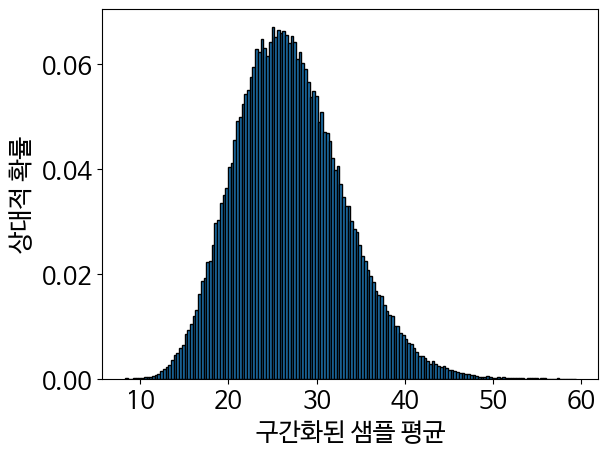

In [26]:
np.random.seed(0)
sample_means = [np.random.choice(fish_lengths,
size=20,
replace=True).mean()
for _ in range(150000)]
likelihoods, bin_edges, _ = plt.hist(sample_means, bins='auto',
edgecolor='black', density=True)
plt.xlabel('구간화된 샘플 평균')
plt.ylabel('상대적 확률')
plt.show()

## 7-20

In [27]:
assert abs(stats.skew(sample_means)) > 0.4

## 7-21

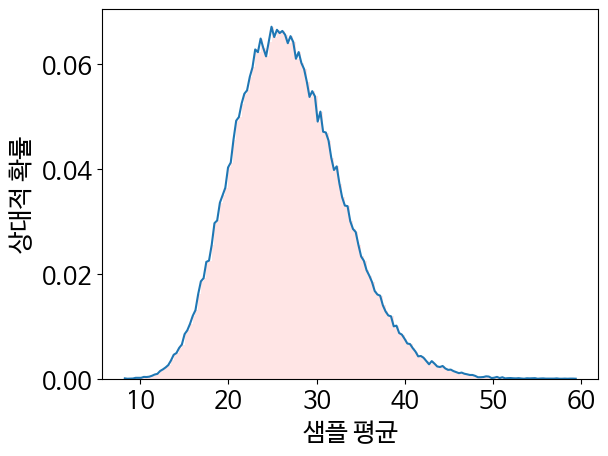

In [28]:
random_variable = stats.rv_histogram((likelihoods, bin_edges))
plt.plot(bin_edges, random_variable.pdf(bin_edges))
plt.hist(sample_means, bins='auto', alpha=0.1, color='r', density=True)
plt.xlabel('샘플 평균')
plt.ylabel('상대적 확률')
plt.show()

## 7-22

분포의 평균은 약 27.00 cm 입니다.


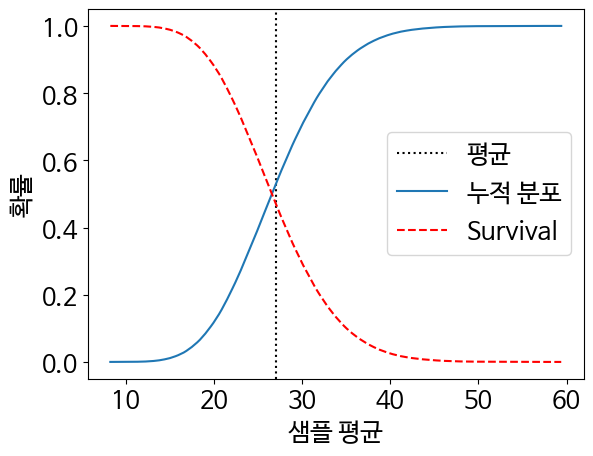

In [29]:
rv_mean = random_variable.mean()
print(f"분포의 평균은 약 {rv_mean:.2f} cm 입니다.")

plt.axvline(random_variable.mean(), color='k', label='평균', linestyle=':')
plt.plot(bin_edges, random_variable.cdf(bin_edges),
label='누적 분포')
plt.plot(bin_edges, random_variable.sf(bin_edges),
label='Survival', linestyle='--', color='r')
plt.xlabel('샘플 평균')
plt.ylabel('확률')
plt.legend()
plt.show()

## 7-23

In [30]:
prob_extreme= random_variable.sf(37) + random_variable.cdf(17)
print(f"극단적인 샘플 평균을 관찰할 확률은 약 {prob_extreme:.2f} 입니다.")

극단적인 샘플 평균을 관찰할 확률은 약 0.10 입니다.


## 7-24

In [32]:
estimated_sem = random_variable.std()
p_value = compute_p_value(27, 37, estimated_sem)
print(f"추정 SEM으로부터 계산된 p-값은 약 {p_value:.2f} 입니다.")

추정 SEM으로부터 계산된 p-값은 약 0.10 입니다.


## 7-25

In [33]:
number_extreme_values = 0
for sample_mean in sample_means:
    if not 17 < sample_mean < 37:
        number_extreme_values += 1

p_value = number_extreme_values / len(sample_means)
print(f"P-값은 약 {p_value:.2f} 입니다")

P-값은 약 0.10 입니다


## 7-26

In [34]:
new_fish_lengths = np.array([51, 46.5, 51.6, 47, 54.4, 40.5, 43, 43.1, 35.9, 47.0])
assert new_fish_lengths.mean() == 46

## 7-27

In [36]:
mean_diff = abs(new_fish_lengths.mean() - fish_lengths.mean())
print(f"두 평균 사이에는 {mean_diff:.2f} 정도의 차이가 존재합니다")

두 평균 사이에는 19.00 정도의 차이가 존재합니다


## 7-28

In [38]:
total_fish_lengths = np.hstack([fish_lengths, new_fish_lengths])
assert total_fish_lengths.size == 30

## 7-29

In [39]:
np.random.seed(0)
np.random.shuffle(total_fish_lengths)

## 7-30

In [40]:
random_20_fish_lengths = total_fish_lengths[:20]
random_10_fish_lengths = total_fish_lengths[20:]
mean_diff = random_20_fish_lengths.mean() - random_10_fish_lengths.mean()
print(f"평균 물고기 길이의 새로운 차이는 {mean_diff:.2f} 입니다.")

평균 물고기 길이의 새로운 차이는 14.33 입니다.


## 7-31

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


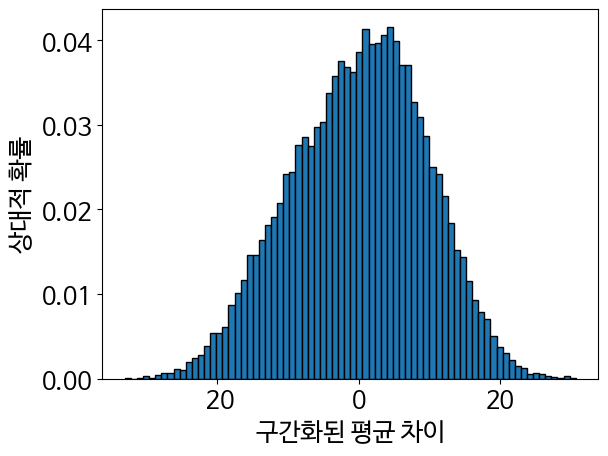

In [41]:
np.random.seed(0)
mean_diffs = []
for _ in range(30000):
    np.random.shuffle(total_fish_lengths)
    mean_diff = total_fish_lengths[:20].mean() - total_fish_lengths[20:].mean()
    mean_diffs.append(mean_diff)

likelihoods, bin_edges, _ = plt.hist(mean_diffs, bins='auto', edgecolor='black', density=True)

plt.xlabel('구간화된 평균 차이')
plt.ylabel('상대적 확률')
plt.show()

## 7-32

In [42]:
random_variable = stats.rv_histogram((likelihoods, bin_edges))

## 7-33

In [43]:
p_value = random_variable.sf(19) + random_variable.cdf(-19)
print(f"P-값은 약 {p_value:.2f} 입니다.")

P-값은 약 0.04 입니다.


## 7-34

In [44]:
number_extreme_values = 0.0
for min_diff in mean_diffs:
    if not -19 < min_diff < 19:
        number_extreme_values += 1

p_value = number_extreme_values / len(mean_diffs)
print(f"P-값은 약 {p_value:.2f} 입니다.")

P-값은 약 0.04 입니다.
